In [14]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
learning_rate=0.01
epochs=1000
step_display=10

In [15]:
x=[3.52,2.58,3.31,4.07,4.62,3.98,4.29,4.83,3.71,4.61,3.90,3.20]
y=[2.48,2.27,2.47,2.77,2.98,3.05,3.18,3.46,3.03,3.25,2.67,2.53]

In [16]:
weight=tf.Variable(tf.random_uniform([1],-1.0,1.0),name="weight")
bias=tf.Variable(tf.random_uniform([1],-1.0,1.0),name="bias")

In [17]:
X=tf.placeholder(dtype=tf.float32,name="X")
Y=tf.placeholder(dtype=tf.float32,name="Y")

In [18]:
y_pred=tf.add(tf.multiply(weight, X), bias)
cost=tf.reduce_mean(tf.square(y_pred - Y))
optimizer=tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [19]:
init = tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

In [20]:
for epoch in range(epochs):
    _,cost_val=sess.run([optimizer,cost], feed_dict={X:x,Y:y})
    if (epoch+1) % step_display == 0:
        print("Epoch:{0}, cost:{1}, weight:{2}, bias:{3}".format(epoch+1,cost_val,sess.run(weight),sess.run(bias)))

Epoch:10, cost:1.3140538930892944, weight:[0.55926275], bias:[-0.41542774]
Epoch:20, cost:0.5065456032752991, weight:[0.64947563], bias:[-0.32494634]
Epoch:30, cost:0.14926737546920776, weight:[0.7216435], bias:[-0.2518921]
Epoch:40, cost:0.06080840900540352, weight:[0.7683465], bias:[-0.20328625]
Epoch:50, cost:0.060829561203718185, weight:[0.7890386], bias:[-0.17954518]
Epoch:60, cost:0.06330642104148865, weight:[0.7907319], bias:[-0.1738729]
Epoch:70, cost:0.05943216383457184, weight:[0.7835481], bias:[-0.17648505]
Epoch:80, cost:0.0569530613720417, weight:[0.7756202], bias:[-0.17950444]
Epoch:90, cost:0.05654140189290047, weight:[0.7707675], bias:[-0.17923546]
Epoch:100, cost:0.056370969861745834, weight:[0.76907563], bias:[-0.17561346]
Epoch:110, cost:0.0560508668422699, weight:[0.7689112], bias:[-0.1702446]
Epoch:120, cost:0.055755507200956345, weight:[0.7687456], bias:[-0.16462973]
Epoch:130, cost:0.05548647418618202, weight:[0.7679432], bias:[-0.1593994]
Epoch:140, cost:0.05520

In [21]:
training_cost=sess.run(cost, feed_dict={X:x,Y:y})
print("최종 cost:",cost_val)
print("정확도:",100-cost_val)
print("최종 가중치:",sess.run(weight))
print("최종 절편:",sess.run(bias))

최종 cost: 0.029967157
정확도: 99.97003284282982
최종 가중치: [0.60388595]
최종 절편: [0.48991355]


In [22]:
print("X: 5,Y:",sess.run(y_pred,feed_dict={X:5}))
print("X: 2.5,Y:",sess.run(y_pred,feed_dict={X:2.5}))

X: 5,Y: [3.5093431]
X: 2.5,Y: [1.9996284]


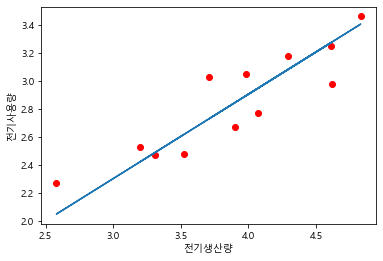

In [12]:
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.plot(x,y,'ro')
plt.plot(x,sess.run(weight)*x+sess.run(bias))
plt.xlabel("전기생산량")
plt.ylabel("전기사용량")
plt.show()

In [13]:
sess.close()